<a href="https://colab.research.google.com/github/Jimmy586/MachineLearningJourney/blob/master/Diabetes_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# بسم الله الرحمن الرحيم

In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import opendatasets as od
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, classification_report

# Load Data

In [ ]:
od.download('https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset')

100%|██████████| 734k/734k [00:00<00:00, 129MB/s]

In [ ]:
df = pd.read_csv('/content/diabetes-prediction-dataset/diabetes_prediction_dataset.csv')
df = df.dropna()
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


# Preprocesing

In [ ]:
df = df.drop(df['gender'][df['gender'] == 'Other'].index, axis=0)

In [ ]:
for i, label in enumerate(np.unique(df['smoking_history'])):
    df['smoking_history'][df['smoking_history'] == label] = i

df['smoking_history'] = df['smoking_history'].astype('int64')

<ipython-input-15-d280456df1ab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoking_history'][df['smoking_history'] == label] = i
<ipython-input-15-d280456df1ab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoking_history'][df['smoking_history'] == label] = i
<ipython-input-15-d280456df1ab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoking_history'][df['smoking_history'] == label] = i
<ipython-input-15-d280

In [ ]:
for i, label in enumerate(np.unique(df['gender'])):
    df['gender'][df['gender'] == label] = i
df['gender'] = df['gender'].astype('int64')

<ipython-input-16-e02977343d2a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'][df['gender'] == label] = i
<ipython-input-16-e02977343d2a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'][df['gender'] == label] = i


In [ ]:
df.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000
mean,0.414375,41.888076,0.074863,0.039427,2.179502,27.320757,5.527529,138.057810,0.085015
std,0.492616,22.517206,0.263172,0.194610,1.889559,6.636853,1.070665,40.709469,0.278906
min,0.000000,0.080000,0.000000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.000000,0.000000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,0.000000,43.000000,0.000000,0.000000,3.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,60.000000,0.000000,0.000000,4.000000,29.580000,6.200000,159.000000,0.000000
max,1.000000,80.000000,1.000000,1.000000,5.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
scaler = MinMaxScaler()

normalized_data = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [ ]:
normalized_data.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000
mean,0.414375,0.523124,0.074863,0.039427,0.435900,0.202040,0.368642,0.263899,0.085015
std,0.492616,0.281747,0.263172,0.194610,0.377912,0.077461,0.194666,0.185043,0.278906
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.299299,0.000000,0.000000,0.000000,0.158964,0.236364,0.090909,0.000000
50%,0.000000,0.537037,0.000000,0.000000,0.600000,0.202031,0.418182,0.272727,0.000000
75%,1.000000,0.749750,0.000000,0.000000,0.800000,0.228408,0.490909,0.359091,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# UnderSamping to solve the Unbalnced Class

In [ ]:
X = df.drop('diabetes',axis=1)
Y = df['diabetes']

In [ ]:
len(Y[Y == 0])

91482

In [ ]:
len(Y[Y == 1])

8500

In [ ]:
rus = RandomUnderSampler(random_state=2)
X_undersampled, y_undersampled = rus.fit_resample(X, Y)

In [ ]:
len(y_undersampled[y_undersampled == 0])

8500

In [ ]:
len(y_undersampled[y_undersampled == 1])

8500

# PCA (Our Recgonition System) and creating X & Y

In [ ]:
def MyPCA(X , num_components):
    X_meaned = X - np.mean(X , axis = 0)
    cov_mat = np.cov(X_meaned.astype(float), rowvar=False)
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]

    eigenvector_subset = sorted_eigenvectors[:,0:num_components]

    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()

    return X_reduced

In [ ]:
PCA_X = MyPCA(X_undersampled, 6)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(PCA_X, y_undersampled, test_size=0.2)

# K_means Class

In [ ]:
class K_means :
  def __init__(self,K) :
    self.data=None
    self.K= K
    self.centroids =[]
    return

  def get_random_centroid(self):
    centers = random.sample(list(self.data),self.K)
    return np.array(centers)

  def update_centroid(self,cluster):
    new_centers=np.array([np.mean(i,axis=0) for i in cluster])
    self.centroids=new_centers
    return self.centroids

  def L2_distance(self,X1,X2):
    dist = X1-X2
    return np.sqrt(np.sum([i**2 for i in dist]))

  def clustring (self):
    clusters= [[] for _ in range(self.K)]
    for sample in self.data :
      dist = [self.L2_distance(i,sample) for i in self.centroids]
      clusters[np.argmin(dist,axis=0)].append(sample)

    return np.array([np.array(i) for i in clusters], dtype=object)


  def fit (self,X,MAX_iter=1000,update_threshold=0.0000001):
    self.data=X
    self.centroids = self.get_random_centroid()
    while(True):
      clusters = self.clustring()
      old_centers=self.centroids
      self.centroids =self.update_centroid(clusters)
      MAX_iter-=1
      if not(MAX_iter) or (np.sum(self.centroids-old_centers)<update_threshold):
        break

  def predict(self,X):
    pred=[]
    for sample in X :
      dist = [self.L2_distance(i,sample) for i in self.centroids]
      pred.append(np.argmin(dist,axis=0))
    return pred

# Fit using scratch k-mean

In [ ]:
model = K_means(2)
model.fit(X_train)

In [ ]:
centroid_FromScratch = model.centroids

In [ ]:
centroid_FromScratch

array([[-8.01964045e+01,  1.64984764e+00,  1.92369861e-01,
        -4.09730566e-03,  4.33502554e-02, -5.23587594e-03],
       [ 2.99067445e+01, -5.67662997e-01, -4.58765073e-02,
         1.58430770e-02, -1.81099747e-02,  3.86191766e-03]])

In [ ]:
pred_FromScratch = model.predict(X_test)

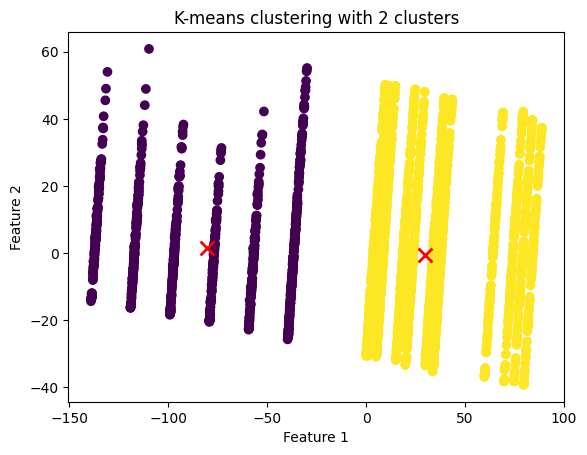

In [ ]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=pred_FromScratch)
plt.scatter(centroid_FromScratch[:,0], centroid_FromScratch[:,1], marker='x', s=100, linewidths=2,color="red")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means clustering with 2 clusters')
plt.show()

In [ ]:
accuracy = 1 - accuracy_score(y_test,pred_FromScratch)
accuracy

0.7005882352941176

# Fit using built-in k-mean

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [ ]:
pred_BuiltIn=kmeans.predict(X_test)

In [ ]:
centroid_BuiltIn=kmeans.cluster_centers_
centroid_BuiltIn

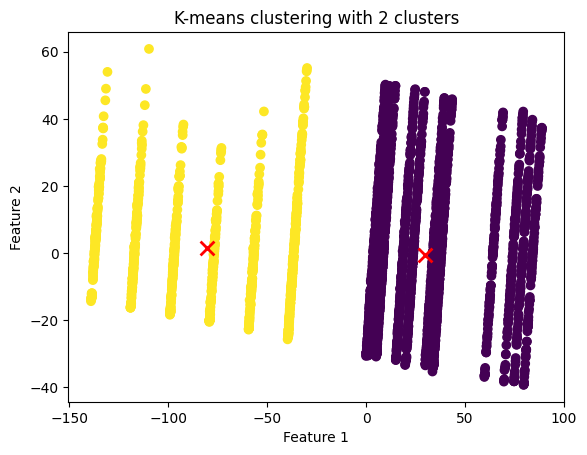

In [ ]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=pred_BuiltIn)
plt.scatter(centroid_BuiltIn[:,0], centroid_BuiltIn[:,1], marker='x', s=100, linewidths=2,color="red")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means clustering with 2 clusters')
plt.show()

# Centroids comparison

In [ ]:
centroid_BuiltIn

array([[ 2.99067445e+01, -5.67662997e-01, -4.58765073e-02,
         1.58430770e-02, -1.81099747e-02,  3.86191766e-03],
       [-8.01964045e+01,  1.64984764e+00,  1.92369861e-01,
        -4.09730566e-03,  4.33502554e-02, -5.23587594e-03]])

In [ ]:
centroid_FromScratch

array([[-8.01964045e+01,  1.64984764e+00,  1.92369861e-01,
        -4.09730566e-03,  4.33502554e-02, -5.23587594e-03],
       [ 2.99067445e+01, -5.67662997e-01, -4.58765073e-02,
         1.58430770e-02, -1.81099747e-02,  3.86191766e-03]])

# Inter Intra Evaluation

In [ ]:
import numpy as np

def intra_cluster_distance(X, labels, centroids):
    distances = np.sqrt(np.sum((X - centroids[labels])**2, axis=1))
    return np.mean(distances)

def inter_cluster_distance(centroids):
    distances = np.sqrt(np.sum((centroids[:, np.newaxis] - centroids)**2, axis=2))
    return np.mean(distances)


##From scratch

In [ ]:
intra_dist = intra_cluster_distance(X_test, pred_FromScratch, centroid_FromScratch)
inter_dist = inter_cluster_distance(centroid_FromScratch)

print(intra_dist)
print(inter_dist)


33.456319017859244
55.062877205073484


##Built In

In [ ]:
intra_dist = intra_cluster_distance(X_test, pred_BuiltIn, centroid_BuiltIn)
inter_dist = inter_cluster_distance(centroid_BuiltIn)

print(intra_dist)
print(inter_dist)


33.45631901785923
55.062877205073434


# report

In [ ]:
# because of the mislabel of the unsupervised clustering
pred = []
for i in pred_FromScratch:
  if i == 0:
    pred.append(1)
  else:
    pred.append(0)

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.63      0.93      0.75      1676
           1       0.87      0.48      0.62      1724

    accuracy                           0.70      3400
   macro avg       0.75      0.70      0.69      3400
weighted avg       0.76      0.70      0.69      3400



# Logistic from scratch

In [ ]:
import numpy as np

class LogisticClassifier:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)

            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

In [ ]:
classifier = LogisticClassifier()

In [ ]:
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

print("accuracy :", accuracy_score(y_test, y_pred))

accuracy : 0.8761764705882353


# تم بحمدالله